In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
screendata = np.genfromtxt('./labeling_files/6.csv', delimiter=',')
tt = np.reshape(screendata[:,0],(screendata.shape[0],1))
with open('./gps_data/AI Tracks at Sea High Frequency GPS_6.txt', 'r') as file:
    output = file.readlines()
trkpts = []
stamps = []
for line in output:
    if '<trkpt' in line:
        trkpts.append((float(line.split("\"")[1]), float(line.split("\"")[3])))
    elif 'time' in line:
        stamps.append(line.split('        <time>')[1].split('</time>\n')[0])
trkpts = np.array(trkpts)

In [32]:
screendata[1]

array([5.0000e-02, 8.8686e+02, 4.3197e+02, 4.2869e+01, 1.6963e+01])

In [15]:
np.savetxt('./cleaned_gps/6/frametime.csv', tt, delimiter=",")

In [28]:
stamps

['2020-09-30T19:33:54Z',
 '2020-09-30T19:33:54Z',
 '2020-09-30T19:33:56Z',
 '2020-09-30T19:33:56Z',
 '2020-09-30T19:33:57Z',
 '2020-09-30T19:34:02Z',
 '2020-09-30T19:34:04Z',
 '2020-09-30T19:34:05Z',
 '2020-09-30T19:34:05Z',
 '2020-09-30T19:34:05Z',
 '2020-09-30T19:34:06Z',
 '2020-09-30T19:34:06Z',
 '2020-09-30T19:34:06Z',
 '2020-09-30T19:34:06Z',
 '2020-09-30T19:34:07Z',
 '2020-09-30T19:34:07Z',
 '2020-09-30T19:34:08Z',
 '2020-09-30T19:34:08Z',
 '2020-09-30T19:34:08Z',
 '2020-09-30T19:34:09Z',
 '2020-09-30T19:34:09Z',
 '2020-09-30T19:34:10Z',
 '2020-09-30T19:34:10Z',
 '2020-09-30T19:34:10Z',
 '2020-09-30T19:34:11Z',
 '2020-09-30T19:34:11Z',
 '2020-09-30T19:34:12Z',
 '2020-09-30T19:34:13Z',
 '2020-09-30T19:34:14Z',
 '2020-09-30T19:34:15Z',
 '2020-09-30T19:34:15Z',
 '2020-09-30T19:34:17Z',
 '2020-09-30T19:34:19Z',
 '2020-09-30T19:34:20Z',
 '2020-09-30T19:34:20Z',
 '2020-09-30T19:34:20Z',
 '2020-09-30T19:34:21Z',
 '2020-09-30T19:34:21Z',
 '2020-09-30T19:34:21Z',
 '2020-09-30T19:34:21Z',


In [38]:
new_gps_timestamps = []
for stamp in stamps:
    new_gps_timestamps.append(stamp.split('T')[1][:-1])

In [44]:
gps_times = pd.Series(new_gps_timestamps)

In [46]:
gps_times.to_csv("./cleaned_gps/6/gps_time_6.csv", index = False, header = False)

In [3]:
lat = 32.70297
lon = -117.234631

In [4]:
trkpts_rel = np.array([(t-lat,n-lon) for t,n in trkpts])

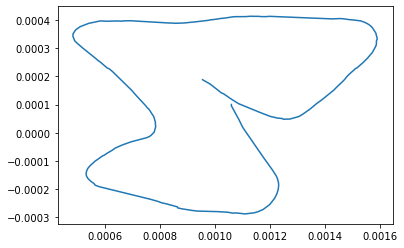

In [49]:
plt.plot(trkpts_rel[:,1],trkpts_rel[:,0])

In [7]:
np.savetxt("./cleaned_gps/6/6_lat_lon_rel.csv", trkpts_rel, delimiter=",")

In [14]:
for i,elem in enumerate(stamps):
    if elem =='2020-09-30T19:36:25Z':
        print(i)

514


In [48]:
import math

In [78]:
min(screendata[:,2])

420.26

In [47]:
bboxes = screendata[:,1:]

In [96]:
center = []
for xLeft, yTop, width, height in bboxes:
    xMin = math.ceil(xLeft)
    xMax = xMin + width - 1
    yMin = math.ceil(yTop)
    yMax = yMin + height - 1
    cx = xLeft+width/2
    cy = yTop+height
    center.append((cx,cy))

In [97]:
location_xy = np.array(center)

In [98]:
np.savetxt("6_xy.csv", location_xy, delimiter=",")

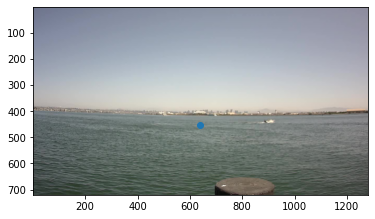

In [104]:
plt.xlim(1,1280)
plt.ylim(1,720)
im = plt.imread("./video_data/6_Moment.jpg")
implot = plt.imshow(im)
plt.gca().invert_yaxis()
plt.scatter(location_xy[3535,0],location_xy[3535,1])


In [100]:
stamps

['18:48:18',
 '18:48:18',
 '18:48:23',
 '18:48:23',
 '18:48:24',
 '18:48:24',
 '18:48:25',
 '18:48:25',
 '18:48:27',
 '18:48:27',
 '18:48:29',
 '18:48:32',
 '18:48:33',
 '18:48:35',
 '18:48:36',
 '18:48:38',
 '18:48:39',
 '18:48:41',
 '18:48:42',
 '18:48:44',
 '18:48:45',
 '18:48:46',
 '18:48:48',
 '18:48:51',
 '18:48:54',
 '18:49:01',
 '18:50:35',
 '18:52:03',
 '18:52:05',
 '18:52:06',
 '18:52:07',
 '18:52:08',
 '18:52:17',
 '18:52:35',
 '18:52:55',
 '18:53:04',
 '18:53:13',
 '18:53:20',
 '18:53:31',
 '18:53:48',
 '18:54:23',
 '18:54:24',
 '18:54:26',
 '18:54:32',
 '18:54:34',
 '18:54:44',
 '18:55:13',
 '18:55:34',
 '18:56:24',
 '18:56:53',
 '18:57:26',
 '18:57:37',
 '18:57:40',
 '18:57:42',
 '18:57:45',
 '18:57:47',
 '18:57:48',
 '18:57:49',
 '18:57:49',
 '18:57:52',
 '18:57:52',
 '18:57:53',
 '18:57:54',
 '18:57:58',
 '18:57:58',
 '18:58:00',
 '18:58:01',
 '18:58:01',
 '18:58:02',
 '18:58:02',
 '18:58:04',
 '18:58:05',
 '18:58:06',
 '18:58:07',
 '18:58:11',
 '18:58:13',
 '18:58:17',

BoundingBox = [xLeft, yTop, width, height]
xMin = ceil(xLeft)
xMax = xMin + width - 1
yMin = ceil(yTop)
yMax = yMin + height - 1

In [18]:
camera_location = pd.read_csv('./camera_gps_logs/SOURCE_GPS_LOG_6_cleaned.csv')

In [51]:
camera_location.head(20)

,Frame No.,UTC Timestamp,Lat,Long,estimated_time
0,0,19:33:54,32.70297,-117.234631,00:00:00
1,1,19:33:54,32.70297,-117.234631,00:00:00
2,2,19:33:54,32.70297,-117.234631,00:00:00
3,3,19:33:54,32.70297,-117.234631,00:00:00
4,4,19:33:54,32.70297,-117.234631,00:00:00
5,5,19:33:54,32.70297,-117.234631,00:00:00
6,6,19:33:54,32.70297,-117.234631,00:00:00
7,7,19:33:54,32.70297,-117.234631,00:00:00
8,8,19:33:54,32.70297,-117.234631,00:00:00
9,9,19:33:54,32.70297,-117.234631,00:00:00
